In [ ]:
#Importar Librerías
import pandas as pd
from datetime import datetime
#Leer la base de datos de sap-cuenta_contrato-dat-b1-v1-20190214 que se llamará Contribuyentes
#El periodo de esta base va hasta Febrero 14 de 2019 en la lista de los contribuyentes
#Consta solo de los contribuyentes de Industria y Comercio
df = pd.read_excel('Contribuyentes.xlsx')
#Visualización de los primeros 5 datos
df.head()
#Dimensiones de la Base
df.shape
#La base cuenta con 324550 datos y 14 variables
#Diccionario de la base de datos 
#Ctcontrato: Una variable única determinada por SAP si inicia por 1 es un contribuyente del impuesto de Industria y Comercio
#TCC: Codigo númerico que describe la cuenta contrato 
#Denominacion_Cuenta_Contrato: Describe la cuenta contrato su tipología
#PB: 
#Nro_de_Identificacion_Contribu: Número de Identificación del Contribuyente
#Codigo_del_Contribuyente: Clave primaria del Contribuyente por SAP
#Contribuyente_Deudor: Clave primaria del Contribuyente Deudor por SAP
#TpIC: Tipo Interlocutor Comercial
#CI: Tipificación del Contribuyente PN: Persona Natural, SV: Persona Jurídica Privada, SP: Persona Jurídica Pública
#Tipo_de_dato_date: Inicio del contribuyente en actividades comerciales
#Fecha_Solicitud_Cancelacion: Fecha Contribuyente hace la solicitud para cancelarse como contribuyente
#Fecha_de_cancelacion_concedid: Fecha en la que la persona dice que no fue más contribuyente
#Fecha_Liquidacion: Fecha en que el contribuyente entra en liquidacion 
#Fecha_en_que_se_aplica_la_reso: Fecha en que se aplica la resolución de la solicitud
#Descripción de la base de datos de variables númericas
df.describe()
#En las variable númericas en la base no tiene mucho sentido su distribución numérica
#Validación de las variables clave primarias
d_Ctacontrato=df.duplicated('Ctacontrato')
pd.value_counts(d_Ctacontrato)
d_Nro_de_Identificacion_Contribu= df.duplicated('Nro_de_Identificacion_Contribu')
pd.value_counts(d_Nro_de_Identificacion_Contribu)
d_Codigo_del_Contribuyente= df.duplicated('Codigo_del_Contribuyente')
pd.value_counts(d_Codigo_del_Contribuyente)
d_Contribuyente_Deudor= df.duplicated('Contribuyente_Deudor')
pd.value_counts(d_Contribuyente_Deudor)
#De las clases que se dicen ser primarias la unica que cumple es la cuenta Contrato, ya que Nro_de_Identificacion_Contribu tiene 80 registros duplicados, Codigo_del_Contribuyente tiene 72 registros duplicados, Contribuyente_Deudor tiene 69 
#registros duplicados. Se necesita establecer de que manera se identifican los contribuyentes
#Se convierte los campos de objetos en fecha a tipo fecha
df['tipo_de_dato_date'] = pd.to_datetime(df["tipo_de_dato_date"], errors="coerce")
df['Fecha_solicitud_Cancelacion'] = pd.to_datetime(df["Fecha_solicitud_Cancelacion"], errors="coerce")
df['Fecha_de_liquidacion'] = pd.to_datetime(df["Fecha_de_liquidacion"], errors="coerce")
#Tabla de frecuencia para el tipo de contribuyente
pd.value_counts(df['Cl'])
100 * df['Cl'].value_counts() / len(df['Cl'])
#El 68,68% de los contribuyentes son personas Naturales y el 31,29% son personas Jurídicas del sector privado
#En la fecha de ingreso del contribuyente analizar los años de inscripción
#Sacar el año de la base de datos 
df['año']=df['tipo_de_dato_date'].dt.year
pd.value_counts(df['año'])
100 * df['año'].value_counts() / len(df['año'])
#Gráfico de año de los contribuyentes
año=pd.DataFrame(df.groupby('año')['año'].count())
año.columns=['conteo']
año=año.reset_index()
año
import matplotlib.pyplot as plt
plt.plot(año['año'],año['conteo'])
plt.axis([2000, 2018, 5000, 18000])
#La inscripción de los contribuyentes viene creciendo en alza de año en año según el gráfico 
#Se crea una variable anulación que es la que representa la cancelación del registro
#Cuando se analizan termina siendo 4044 contribuyentes que se han anulado en la base representan el 1,24%.
#Al analizar los tiempos de respuesta de una solicitud, se encuentran algunas tipologías donde las fechas estan erroneos, sin embargo con los datos que se encuentran correctos
#en mediana se responde a 150 días alrededor de 5 meses.

#Leer la base de datos de RIT
dfR = pd.read_excel('Rit.xlsx',keep_default_na= False)
#Visualizacion de datos
dfR.head()
#Dimensiones de la base 
dfR.shape
#La base cuenta con 949359 con 41 variables
#Variables
#Estatus: Es el estado del formulario, toma valores de P y V (Procesado y Validado) son los que se tendrán en cuenta 
pd.value_counts(dfR['Status'])
100 * dfR['Status'].value_counts() / len(dfR['Status'])
#El 98,73 de los formularios se encuentran en la categoría Procesado 
#Tipo de Matrícula: Poseen dos tipos que son Establecimientos y Contribuyentes
pd.value_counts(dfR['Clase_de_Matricula_Contribuye'])
100 * dfR['Clase_de_Matricula_Contribuye'].value_counts() / len(dfR['Clase_de_Matricula_Contribuye'])
#El 48,43% tienen de tipo de matrícula de Contribuyente 
#Opción de Uso: Tipo de uso, toma valores de 1: Inscripción, 2:Modificación y 3: Cierre
#El 51,18% utilizan el formulario para inscripción
#Fecha de Creación del Formulario 
#Transformación a fecha
dfR['Fecha_de_Creacion_del_formular'] = pd.to_datetime(df["Fecha_de_Creacion_del_formular"], errors="coerce")
#Número de formato: Es la clave primaria del formulario
#Tipo de Cancelación: Cancelación parcial o total 
#El 27,24% es un cancelación Total
#Se crea la variable de dfP que indica que solo son los formularios que toman valores de Procesado y Validado
dfP=dfR[(dfR['Status']=="P") | (dfR['Status']=="V")]
#Ahora se crea un dataframe llamado EstablecimientosR que son los establecimientos registrados que se tendrían por cédula
EstablecimientosR=dfP.groupby(['CC_o_Nit'],as_index=False)['Clase_de_Matricula_Contribuye'].count().rename(columns={'Clase_de_Matricula_Contribuye':'EstablecimientosRegistrados'})
#Se realiza un merge con la tabla dfP con establecimientos 
dfP2=dfP.merge(EstablecimientosR,how='left',on='CC_o_Nit')
#Creo una función que me permite poner el codigo adecuado de actividad
def test(v1, v2):   
    if (v1!="" and v2==""):
        return v1
    if (v1=="" and v2!=""):
        return v2
    if (v1!="" and v2!=""):
        return v2
    if (v1=="" and v2==""):
        return v2    
#Recategorizo la variable Codigo Actividad y Codigo CIU
dfP2['Codigos_CIIU'] = dfP2['Codigos_CIIU'].astype("category")
dfP2['Cod_Actividad'] = dfP2['Cod_Actividad'].astype("category")
#Creo una nueva Columna llamada Codigo Actividad
dfP2['CodigoActividadF'] = dfP2.apply(lambda x: test(x.Cod_Actividad,x.Codigos_CIIU), axis=1)
#Ordeno el Dataframe por Cedulas y Fecha de Creación del Formulario
dfP3=dfP2.sort_values(by=['CC_o_Nit','Fecha_de_Creacion_del_formular'],ascending=[1, 0])
#Elimino los duplicados, dejando el registro mas reciente en la fecha de creación del formulario
dfP4=dfP3.drop_duplicates(('CC_o_Nit'))
#La base me queda con 320893 registros y 43 variables
dfP4.shape
#Elijo las variable que a mi criterio pueden aportar en el modelo eliminando las siguientes
dfP5=dfP4.drop(['Tipos_de_formato','F_I_Actividades','Estado_Matricula','Clase_de_Contribuyente','Fecha','Fecha_solicitud_Cancelacion','Fecha_de_cancelacion_concedid',
                'Fecha_solicitada_de_Cancelacio','Fecha_concedida_para_la_cancel','Fecha_de_liquidacion','Pos','F_I_Actividades2','Numero_de_Formato','Tip_Cancelacion',
               'Nr_Est_Clausura','Naturaleza_Juridica','Numero_resolucion','Fecha_Creacion_resolucion','TCC','TCC2','TCC3','Clase_de_Contribuyente2','Dir_Descriptiva','Cod_Actividad',
               'Cod_Actividad2','Cod_Actividad3','Codigos_CIIU','Codigos_CIIU2','Codigos_CIIU3','Direccion2','Dir_Descriptiva2'],axis=1)
#La base me queda con 320893 registros y 12 columnas de las cuales quedaron las siguientes variables: Status,Clase de Matrícula del Contribuyente,Opción de uso,CC_o_Nit, Fecha de
#creación del formulario, Tipo de Sociedad, Direccion, Telefono, OfVta, Avisos, EstablecimientosRegistrados, Codigo de Actividad
dfP5.shape
#Voy a quitar los registros que sean anulados en inscripción del formulario que representan el 1,24% de los registros 4044




In [32]:
import pandas as pd
from datetime import datetime
import numpy as np

In [33]:
df = pd.read_excel('Contribuyentes.xlsx',keep_default_na= False)

In [34]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,31.01.2019,00.00.0000,00.00.0000,00.00.0000,00.00.0000
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,08.02.2019,00.00.0000,00.00.0000,00.00.0000,00.00.0000
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,08.02.2019,00.00.0000,00.00.0000,00.00.0000,00.00.0000
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,08.02.2019,00.00.0000,00.00.0000,00.00.0000,00.00.0000
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,08.02.2019,00.00.0000,00.00.0000,00.00.0000,00.00.0000


In [35]:
df[df.duplicated('Nro_de_Identificacion_Contribu')]

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
74804,10247816,2,Industria y Comercio,,900546499,9550351921,7540438443,2,SV,17.08.2012,00.00.0000,00.00.0000,00.00.0000,00.00.0000
103488,10166600,2,Industria y Comercio,,52828067,52828067,52828067,1,PN,19.06.2008,03.08.2009,17.05.2013,15.11.2018,13.05.2014
105964,10169573,2,Industria y Comercio,,24987586,9540033678,24987586,1,PN,21.08.2008,00.00.0000,00.00.0000,00.00.0000,00.00.0000
106718,10169624,2,Industria y Comercio (PROP.UN),,18597767UNN,18597767,18597767,1,PN,01.10.2008,01.10.2008,01.10.2008,25.02.2014,25.02.2014
113798,10180132,2,Industria y Comercio,,900213852,900213852,900213852,2,SV,09.02.2009,06.03.2018,06.03.2018,28.10.2018,06.03.2018
114089,10284277,2,Industria y Comercio,,1128445302,9550174053,7540195092,1,PN,17.06.2014,17.07.2015,17.07.2015,28.09.2015,17.07.2015
122489,10318065,2,Industria y Comercio,,71938281,9530238380,7540038965,1,PN,02.07.2008,00.00.0000,00.00.0000,00.00.0000,00.00.0000
128275,10198531,2,Industria y Comercio (PROP.UN),,800106884UN,9540033845,800106884,2,SV,03.05.2010,10.12.2012,10.12.2012,10.12.2012,10.12.2012
131191,10268557,2,Industria y Comercio,,71658524,9530256702,7540063416,1,PN,03.02.2009,27.12.2013,00.00.0000,00.00.0000,00.00.0000
135400,10301036,2,Industria y Comercio,,70907357,9530329761,7540085610,1,PN,29.07.2009,00.00.0000,00.00.0000,00.00.0000,00.00.0000


In [36]:
df[df['Nro_de_Identificacion_Contribu']==900546499]

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
74803,10247817,2,Industria y Comercio,,900546499,9550351921,7540438443,2,SV,17.08.2012,00.00.0000,00.00.0000,00.00.0000,00.00.0000
74804,10247816,2,Industria y Comercio,,900546499,9550351921,7540438443,2,SV,17.08.2012,00.00.0000,00.00.0000,00.00.0000,00.00.0000


In [37]:
d_Nro_de_Identificacion_Contribu= df.duplicated('Nro_de_Identificacion_Contribu')

In [38]:
pd.value_counts(d_Nro_de_Identificacion_Contribu)

False    324470
True         80
dtype: int64

In [39]:
d_Codigo_del_Contribuyente= df.duplicated('Codigo_del_Contribuyente')
pd.value_counts(d_Codigo_del_Contribuyente)

False    324478
True         72
dtype: int64

In [40]:
df[df.duplicated('Codigo_del_Contribuyente')]

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
74804,10247816,2,Industria y Comercio,,900546499,9550351921,7540438443,2,SV,17.08.2012,00.00.0000,00.00.0000,00.00.0000,00.00.0000
103488,10166600,2,Industria y Comercio,,52828067,52828067,52828067,1,PN,19.06.2008,03.08.2009,17.05.2013,15.11.2018,13.05.2014
105964,10169573,2,Industria y Comercio,,24987586,9540033678,24987586,1,PN,21.08.2008,00.00.0000,00.00.0000,00.00.0000,00.00.0000
106718,10169624,2,Industria y Comercio (PROP.UN),,18597767UNN,18597767,18597767,1,PN,01.10.2008,01.10.2008,01.10.2008,25.02.2014,25.02.2014
113798,10180132,2,Industria y Comercio,,900213852,900213852,900213852,2,SV,09.02.2009,06.03.2018,06.03.2018,28.10.2018,06.03.2018
114089,10284277,2,Industria y Comercio,,1128445302,9550174053,7540195092,1,PN,17.06.2014,17.07.2015,17.07.2015,28.09.2015,17.07.2015
128275,10198531,2,Industria y Comercio (PROP.UN),,800106884UN,9540033845,800106884,2,SV,03.05.2010,10.12.2012,10.12.2012,10.12.2012,10.12.2012
150934,10090264,2,Industria y Comercio,,71635844,9540017625,71635844,1,PN,00.00.0000,00.00.0000,00.00.0000,00.00.0000,00.00.0000
164714,10224177,2,Industria y Comercio,,98489373,9530147633,98489373,1,PN,02.01.2011,17.07.2014,17.07.2014,00.00.0000,17.07.2014
166536,10166030,2,Industria y Comercio,,98512034,98512034,98512034,1,PN,00.00.0000,00.00.0000,30.11.2008,00.00.0000,00.00.0000


In [41]:
df[df['Codigo_del_Contribuyente']==9550351921]

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
74803,10247817,2,Industria y Comercio,,900546499,9550351921,7540438443,2,SV,17.08.2012,00.00.0000,00.00.0000,00.00.0000,00.00.0000
74804,10247816,2,Industria y Comercio,,900546499,9550351921,7540438443,2,SV,17.08.2012,00.00.0000,00.00.0000,00.00.0000,00.00.0000


In [42]:
df.dtypes

Ctacontrato                        int64
TCC                                int64
Denominacion_cuenta_contrato      object
PB                                object
Nro_de_Identificacion_Contribu    object
Codigo_del_Contribuyente           int64
Contribuyente_Deudor               int64
TpIC                               int64
Cl                                object
tipo_de_dato_date                 object
Fecha_solicitud_Cancelacion       object
Fecha_de_cancelacion_concedid     object
Fecha_de_liquidacion              object
Fecha_en_que_se_aplica_la_reso    object
dtype: object

In [43]:
df['tipo_de_dato_date'] = pd.to_datetime(df["tipo_de_dato_date"], errors="coerce")

In [44]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,00.00.0000,00.00.0000,00.00.0000,00.00.0000
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,00.00.0000,00.00.0000,00.00.0000,00.00.0000
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,00.00.0000,00.00.0000,00.00.0000,00.00.0000
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,00.00.0000,00.00.0000,00.00.0000,00.00.0000
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,00.00.0000,00.00.0000,00.00.0000,00.00.0000


In [46]:
df['Fecha_solicitud_Cancelacion'] = pd.to_datetime(df["Fecha_solicitud_Cancelacion"], errors="coerce")

In [47]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,00.00.0000,00.00.0000,00.00.0000
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,00.00.0000,00.00.0000,00.00.0000
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,00.00.0000,00.00.0000,00.00.0000
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,00.00.0000,00.00.0000,00.00.0000
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,00.00.0000,00.00.0000,00.00.0000


In [48]:
df['Fecha_de_cancelacion_concedid'] = pd.to_datetime(df["Fecha_de_cancelacion_concedid"], errors="coerce")

In [49]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,00.00.0000,00.00.0000
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,00.00.0000,00.00.0000
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,00.00.0000,00.00.0000
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,00.00.0000,00.00.0000
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,00.00.0000,00.00.0000


In [51]:
df['Fecha_de_liquidacion'] = pd.to_datetime(df["Fecha_de_liquidacion"], errors="coerce")

In [52]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,NaT,00.00.0000
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,NaT,00.00.0000
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,NaT,00.00.0000
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,NaT,00.00.0000
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,NaT,00.00.0000


In [53]:
df['Fecha_en_que_se_aplica_la_reso'] = pd.to_datetime(df["Fecha_en_que_se_aplica_la_reso"], errors="coerce")

In [54]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,NaT,NaT
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,NaT,NaT
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,NaT,NaT
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,NaT,NaT
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,NaT,NaT


In [55]:
pd.value_counts(df['Cl'])

PN    222904
SV    101578
SP        68
Name: Cl, dtype: int64

In [56]:
100 * df['Cl'].value_counts() / len(df['Cl'])

PN    68.680943
SV    31.298105
SP     0.020952
Name: Cl, dtype: float64

In [57]:
df.dtypes

Ctacontrato                                int64
TCC                                        int64
Denominacion_cuenta_contrato              object
PB                                        object
Nro_de_Identificacion_Contribu            object
Codigo_del_Contribuyente                   int64
Contribuyente_Deudor                       int64
TpIC                                       int64
Cl                                        object
tipo_de_dato_date                 datetime64[ns]
Fecha_solicitud_Cancelacion       datetime64[ns]
Fecha_de_cancelacion_concedid     datetime64[ns]
Fecha_de_liquidacion              datetime64[ns]
Fecha_en_que_se_aplica_la_reso    datetime64[ns]
dtype: object

In [58]:
df['AñoDeclaradoC']=df['tipo_de_dato_date'].dt.year

In [59]:
df['MesDeclaradoC']=df['tipo_de_dato_date'].dt.month

In [60]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso,AñoDeclaradoC,MesDeclaradoC
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,NaT,NaT,2019.0,1.0
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0


In [61]:
año=pd.value_counts(df['AñoDeclaradoC'])

In [62]:
año=pd.DataFrame(df.groupby('AñoDeclaradoC')['AñoDeclaradoC'].count())
año.columns=['conteo']
año=año.reset_index()
año

,AñoDeclaradoC,conteo
0,1945.0,2
1,1950.0,2698
2,1951.0,2
3,1952.0,2
4,1953.0,1
5,1954.0,5
6,1956.0,12
7,1957.0,610
8,1958.0,181
9,1959.0,100


In [63]:
import matplotlib.pyplot as plt

[2000, 2018, 5000, 18000]

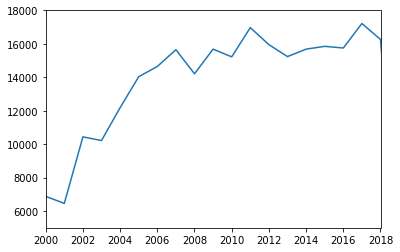

In [64]:
plt.plot(año['AñoDeclaradoC'],año['conteo'])
plt.axis([2000, 2018, 5000, 18000])

In [65]:
def Anulacion(v1, v2):   
    if (v1==v2):
        return 1
    else:
        return 0

In [66]:
df['Anulacion'] = df.apply(lambda x: Anulacion(x.tipo_de_dato_date,x.Fecha_de_cancelacion_concedid), axis=1)

In [67]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso,AñoDeclaradoC,MesDeclaradoC,Anulacion
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,NaT,NaT,2019.0,1.0,0
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0


In [68]:
pd.value_counts(df['Anulacion'])

0    320506
1      4044
Name: Anulacion, dtype: int64

In [69]:
100 * df['Anulacion'].value_counts() / len(df['Anulacion'])

0    98.753967
1     1.246033
Name: Anulacion, dtype: float64

In [70]:
df['TiempoRespuestaSolicitud']=df['Fecha_en_que_se_aplica_la_reso']-df['Fecha_solicitud_Cancelacion']

In [71]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,NaT,NaT,2019.0,1.0,0,NaT
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT


In [72]:
pd.value_counts(df['TiempoRespuestaSolicitud'])

0 days        44193
3226 days       261
28 days         226
368 days        213
35 days         213
273 days        203
34 days         203
118 days        201
36 days         200
63 days         197
126 days        196
140 days        196
85 days         196
125 days        194
90 days         192
186 days        191
95 days         191
146 days        189
64 days         189
42 days         187
119 days        187
62 days         185
57 days         184
92 days         184
29 days         182
84 days         181
147 days        181
93 days         180
27 days         180
56 days         179
              ...  
-396 days         1
-892 days         1
-2130 days        1
4164 days         1
5487 days         1
6262 days         1
4178 days         1
6073 days         1
3597 days         1
3408 days         1
4457 days         1
6347 days         1
-585 days         1
-722 days         1
4471 days         1
8048 days         1
4712 days         1
5761 days         1
-911 days         1


In [73]:
df['TiempoRespuestaSolicitud'].mean()

Timedelta('601 days 01:38:27.327871')

In [74]:
df.dtypes

Ctacontrato                                 int64
TCC                                         int64
Denominacion_cuenta_contrato               object
PB                                         object
Nro_de_Identificacion_Contribu             object
Codigo_del_Contribuyente                    int64
Contribuyente_Deudor                        int64
TpIC                                        int64
Cl                                         object
tipo_de_dato_date                  datetime64[ns]
Fecha_solicitud_Cancelacion        datetime64[ns]
Fecha_de_cancelacion_concedid      datetime64[ns]
Fecha_de_liquidacion               datetime64[ns]
Fecha_en_que_se_aplica_la_reso     datetime64[ns]
AñoDeclaradoC                             float64
MesDeclaradoC                             float64
Anulacion                                   int64
TiempoRespuestaSolicitud          timedelta64[ns]
dtype: object

In [75]:
df['TiempoRespuestaDías']=df['TiempoRespuestaSolicitud'].dt.days

In [76]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,NaT,NaT,2019.0,1.0,0,NaT,NaN
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN


In [78]:
pd.value_counts(df['TiempoRespuestaDías'])

 0.0        44193
 3226.0       261
 28.0         226
 35.0         213
 368.0        213
 34.0         203
 273.0        203
 118.0        201
 36.0         200
 63.0         197
 85.0         196
 126.0        196
 140.0        196
 125.0        194
 90.0         192
 186.0        191
 95.0         191
 146.0        189
 64.0         189
 42.0         187
 119.0        187
 62.0         185
 57.0         184
 92.0         184
 29.0         182
 84.0         181
 147.0        181
 93.0         180
 27.0         180
 56.0         179
            ...  
-4516.0         1
 5243.0         1
 5245.0         1
 4166.0         1
 3673.0         1
 5251.0         1
-1241.0         1
 4816.0         1
 5076.0         1
 5255.0         1
-884.0          1
 18536.0        1
 4280.0         1
-3527.0         1
 3669.0         1
 3758.0         1
 6588.0         1
 5438.0         1
-2876.0         1
 5271.0         1
 5275.0         1
 3526.0         1
 5278.0         1
 5281.0         1
 4170.0   

In [79]:
def RespuestaP(v1):   
    if (v1>=0):
        return v1 

In [80]:
df['RespuestaPositiva'] = df.apply(lambda x: RespuestaP(x.TiempoRespuestaDías), axis=1)

In [81]:
df['RespuestaPositiva'].median()

149.0

In [82]:
150/30

5.0

In [83]:
df.head()

,Ctacontrato,TCC,Denominacion_cuenta_contrato,PB,Nro_de_Identificacion_Contribu,Codigo_del_Contribuyente,Contribuyente_Deudor,TpIC,Cl,tipo_de_dato_date,Fecha_solicitud_Cancelacion,Fecha_de_cancelacion_concedid,Fecha_de_liquidacion,Fecha_en_que_se_aplica_la_reso,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva
0,10358346,2,Industria y Comercio,,98649909,9551415384,7541209785,1,PN,2019-01-31,NaT,NaT,NaT,NaT,2019.0,1.0,0,NaT,NaN,NaN
1,10359023,2,Industria y Comercio,,1146442480,9551419908,7541213035,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN,NaN
2,10358920,2,Industria y Comercio,,901253153,9551420007,7541213067,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN,NaN
3,10359117,2,Industria y Comercio,,901253152,9551420009,7541213135,2,SV,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN,NaN
4,10358922,2,Industria y Comercio,,1214740776,9551420027,7541213070,1,PN,2019-08-02,NaT,NaT,NaT,NaT,2019.0,8.0,0,NaT,NaN,NaN


In [84]:
df.dtypes

Ctacontrato                                 int64
TCC                                         int64
Denominacion_cuenta_contrato               object
PB                                         object
Nro_de_Identificacion_Contribu             object
Codigo_del_Contribuyente                    int64
Contribuyente_Deudor                        int64
TpIC                                        int64
Cl                                         object
tipo_de_dato_date                  datetime64[ns]
Fecha_solicitud_Cancelacion        datetime64[ns]
Fecha_de_cancelacion_concedid      datetime64[ns]
Fecha_de_liquidacion               datetime64[ns]
Fecha_en_que_se_aplica_la_reso     datetime64[ns]
AñoDeclaradoC                             float64
MesDeclaradoC                             float64
Anulacion                                   int64
TiempoRespuestaSolicitud          timedelta64[ns]
TiempoRespuestaDías                       float64
RespuestaPositiva                         float64


In [85]:
df2=df.drop(['Ctacontrato','TCC','Denominacion_cuenta_contrato','PB','Codigo_del_Contribuyente','Contribuyente_Deudor','TpIC',
                'tipo_de_dato_date','Fecha_solicitud_Cancelacion','Fecha_de_cancelacion_concedid','Fecha_de_liquidacion','Fecha_en_que_se_aplica_la_reso'],axis=1)

In [86]:
df2.head()

,Nro_de_Identificacion_Contribu,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva
0,98649909,PN,2019.0,1.0,0,NaT,NaN,NaN
1,1146442480,PN,2019.0,8.0,0,NaT,NaN,NaN
2,901253153,SV,2019.0,8.0,0,NaT,NaN,NaN
3,901253152,SV,2019.0,8.0,0,NaT,NaN,NaN
4,1214740776,PN,2019.0,8.0,0,NaT,NaN,NaN


In [87]:
df2.shape

(324550, 8)

In [88]:
dfR = pd.read_excel('Rit.xlsx',keep_default_na= False)

In [89]:
dfR.head()

,Tipos_de_formato,Status,Clase_de_Matricula_Contribuye,F_I_Actividades,Opcion_de_Uso,Estado_Matricula,Clase_de_Contribuyente,Fecha,CC_o_Nit,Fecha_solicitud_Cancelacion,...,Cod_Actividad,Cod_Actividad2,Cod_Actividad3,Codigos_CIIU,Codigos_CIIU2,Codigos_CIIU3,OfVta,Direccion2,Dir_Descriptiva2,Avisos
0,MA,P,C,05.11.2003,1,A,1,05.11.2003,42687219,00.00.0000,...,307,,,,,,102,CR52NCL459204,,
1,MA,P,C,01.11.2003,1,A,1,05.11.2003,43977845,00.00.0000,...,308,,,,,4A,102,CL 030 A 58 05 202,,
2,MA,I,C,05.11.2003,1,I,1,05.11.2003,43563884,00.00.0000,...,206,,,,,4A,102,CL 44 75 64,,
3,MA,P,C,05.11.2003,1,I,1,05.11.2003,43819027,00.00.0000,...,301,,,,,4A,102,CR74CL118204,,
4,MA,P,C,05.11.2003,1,A,1,05.11.2003,71771884,00.00.0000,...,206,,,,,,102,CR 52 44 70 261,,X


In [90]:
dfR.shape

(949359, 41)

In [91]:
pd.value_counts(dfR['Status'])

P    937362
A      8838
V      2129
I      1030
Name: Status, dtype: int64

In [92]:
100 * dfR['Status'].value_counts() / len(dfR['Status'])

P    98.736305
A     0.930944
V     0.224257
I     0.108494
Name: Status, dtype: float64

In [93]:
pd.value_counts(dfR['Clase_de_Matricula_Contribuye'])

C    459857
E    373696
     115806
Name: Clase_de_Matricula_Contribuye, dtype: int64

In [94]:
100 * dfR['Clase_de_Matricula_Contribuye'].value_counts() / len(dfR['Clase_de_Matricula_Contribuye'])

C    48.438683
E    39.362981
     12.198336
Name: Clase_de_Matricula_Contribuye, dtype: float64

In [95]:
pd.value_counts(dfR['Opcion_de_Uso'])

1    485893
3    269645
2    193821
Name: Opcion_de_Uso, dtype: int64

In [96]:
100 * dfR['Opcion_de_Uso'].value_counts() / len(dfR['Opcion_de_Uso'])

1    51.181165
3    28.402849
2    20.415986
Name: Opcion_de_Uso, dtype: float64

In [97]:
dfR.columns.values

array(['Tipos_de_formato', 'Status', 'Clase_de_Matricula_Contribuye',
       'F_I_Actividades', 'Opcion_de_Uso', 'Estado_Matricula',
       'Clase_de_Contribuyente', 'Fecha', 'CC_o_Nit',
       'Fecha_solicitud_Cancelacion', 'Fecha_de_cancelacion_concedid',
       'Fecha_solicitada_de_Cancelacio', 'Fecha_concedida_para_la_cancel',
       'Fecha_de_Creacion_del_formular', 'Fecha_de_liquidacion', 'Pos',
       'F_I_Actividades2', 'Numero_de_Formato', 'Tip_Cancelacion',
       'Nr_Est_Clausura', 'Naturaleza_Juridica', 'Tipo_Sociedad',
       'Numero_resolucion', 'Fecha_Creacion_resolucion', 'TCC', 'TCC2',
       'TCC3', 'Clase_de_Contribuyente2', 'Dir_Descriptiva', 'Direccion',
       'Telefono_1', 'Cod_Actividad', 'Cod_Actividad2', 'Cod_Actividad3',
       'Codigos_CIIU', 'Codigos_CIIU2', 'Codigos_CIIU3', 'OfVta',
       'Direccion2', 'Dir_Descriptiva2', 'Avisos'], dtype=object)

In [98]:
dfR['Fecha_de_Creacion_del_formular'] = pd.to_datetime(dfR["Fecha_de_Creacion_del_formular"], errors="coerce")

In [99]:
dfR['Fecha_de_Creacion_del_formular']

0        2008-09-17
1        2008-09-17
2        2008-09-17
3        2008-09-17
4        2008-09-17
5        2008-09-17
6        2008-09-17
7        2008-09-17
8        2008-09-17
9        2008-09-17
10       2008-09-17
11       2008-09-17
12       2008-09-17
13       2008-09-17
14       2008-09-17
15       2008-09-17
16       2008-09-17
17       2008-09-17
18       2008-09-17
19       2008-09-17
20       2008-09-17
21       2008-09-17
22       2008-09-17
23       2008-09-17
24       2008-09-17
25       2008-09-17
26       2008-09-17
27       2008-09-17
28       2008-09-17
29       2008-09-17
            ...    
949329   2017-12-04
949330   2017-12-04
949331   2017-12-04
949332   2017-12-04
949333   2017-12-04
949334   2017-12-04
949335   2017-12-04
949336   2017-12-04
949337   2017-12-04
949338   2017-12-04
949339   2017-12-04
949340   2017-12-04
949341   2017-12-04
949342   2017-12-04
949343   2017-12-04
949344   2017-12-04
949345   2017-12-04
949346   2017-12-04
949347   2017-04-17


In [100]:
pd.value_counts(dfR['Tip_Cancelacion'])

     679945
T    258637
P     10777
Name: Tip_Cancelacion, dtype: int64

In [101]:
100 * dfR['Tip_Cancelacion'].value_counts() / len(dfR['Tip_Cancelacion'])

     71.621484
T    27.243329
P     1.135187
Name: Tip_Cancelacion, dtype: float64

In [102]:
dfP=dfR[(dfR['Status']=="P") | (dfR['Status']=="V")]

In [103]:
EstablecimientosR=dfP.groupby(['CC_o_Nit'],as_index=False)['Clase_de_Matricula_Contribuye'].count().rename(columns={'Clase_de_Matricula_Contribuye':'EstablecimientosRegistrados'})

In [104]:
dfP.head()

,Tipos_de_formato,Status,Clase_de_Matricula_Contribuye,F_I_Actividades,Opcion_de_Uso,Estado_Matricula,Clase_de_Contribuyente,Fecha,CC_o_Nit,Fecha_solicitud_Cancelacion,...,Cod_Actividad,Cod_Actividad2,Cod_Actividad3,Codigos_CIIU,Codigos_CIIU2,Codigos_CIIU3,OfVta,Direccion2,Dir_Descriptiva2,Avisos
0,MA,P,C,05.11.2003,1,A,1,05.11.2003,42687219,00.00.0000,...,307,,,,,,102,CR52NCL459204,,
1,MA,P,C,01.11.2003,1,A,1,05.11.2003,43977845,00.00.0000,...,308,,,,,4A,102,CL 030 A 58 05 202,,
3,MA,P,C,05.11.2003,1,I,1,05.11.2003,43819027,00.00.0000,...,301,,,,,4A,102,CR74CL118204,,
4,MA,P,C,05.11.2003,1,A,1,05.11.2003,71771884,00.00.0000,...,206,,,,,,102,CR 52 44 70 261,,X
5,MA,P,C,15.10.2003,1,I,1,05.11.2003,43620616,00.00.0000,...,308,,,,,4A,102,CR80CL533504,,


In [105]:
dfP2=dfP.merge(EstablecimientosR,how='left',on='CC_o_Nit')

In [106]:
dfP2.head()

,Tipos_de_formato,Status,Clase_de_Matricula_Contribuye,F_I_Actividades,Opcion_de_Uso,Estado_Matricula,Clase_de_Contribuyente,Fecha,CC_o_Nit,Fecha_solicitud_Cancelacion,...,Cod_Actividad2,Cod_Actividad3,Codigos_CIIU,Codigos_CIIU2,Codigos_CIIU3,OfVta,Direccion2,Dir_Descriptiva2,Avisos,EstablecimientosRegistrados
0,MA,P,C,05.11.2003,1,A,1,05.11.2003,42687219,00.00.0000,...,,,,,,102,CR52NCL459204,,,8
1,MA,P,C,01.11.2003,1,A,1,05.11.2003,43977845,00.00.0000,...,,,,,4A,102,CL 030 A 58 05 202,,,5
2,MA,P,C,05.11.2003,1,I,1,05.11.2003,43819027,00.00.0000,...,,,,,4A,102,CR74CL118204,,,2
3,MA,P,C,05.11.2003,1,A,1,05.11.2003,71771884,00.00.0000,...,,,,,,102,CR 52 44 70 261,,X,1
4,MA,P,C,15.10.2003,1,I,1,05.11.2003,43620616,00.00.0000,...,,,,,4A,102,CR80CL533504,,,2


In [107]:
dfP2.shape

(939491, 42)

In [108]:
def test(v1, v2):   
    if (v1!="" and v2==""):
        return v1
    if (v1=="" and v2!=""):
        return v2
    if (v1!="" and v2!=""):
        return v2
    if (v1=="" and v2==""):
        return v2    

In [109]:
dfP2['Codigos_CIIU'] = dfP2['Codigos_CIIU'].astype("category")
dfP2['Cod_Actividad'] = dfP2['Cod_Actividad'].astype("category")

In [110]:
dfP2['CodigoActividadF'] = dfP2.apply(lambda x: test(x.Cod_Actividad,x.Codigos_CIIU), axis=1)

In [111]:
dfP2.tail()

,Tipos_de_formato,Status,Clase_de_Matricula_Contribuye,F_I_Actividades,Opcion_de_Uso,Estado_Matricula,Clase_de_Contribuyente,Fecha,CC_o_Nit,Fecha_solicitud_Cancelacion,...,Cod_Actividad3,Codigos_CIIU,Codigos_CIIU2,Codigos_CIIU3,OfVta,Direccion2,Dir_Descriptiva2,Avisos,EstablecimientosRegistrados,CodigoActividadF
939486,MA,P,E,01.06.2013,3,P,1,17.04.2017,900269824,00.00.0000,...,,4649,,,100,CR 025 S 001 A 045 01679,,X,18,4649
939487,MA,P,C,01.01.2015,1,A,1,17.04.2017,30315381,00.00.0000,...,,4773,,,106,CR 047 052 086 00141,,X,2,4773
939488,MA,P,E,21.12.2012,2,A,1,17.04.2017,900579862,00.00.0000,...,,,,,106,CL S 003 038 125 01907,,,4,
939489,MA,P,C,17.04.2017,1,A,1,17.04.2017,43985831,00.00.0000,...,,7490,4723,,100,CL 024 071 A 022 00000,,X,1,7490
939490,MA,P,E,17.04.2017,1,A,1,17.04.2017,900428942,00.00.0000,...,,1410,,,100,CR 035 008 A 059 00101,,,7,1410


In [112]:
dfP2.dtypes

Tipos_de_formato                          object
Status                                    object
Clase_de_Matricula_Contribuye             object
F_I_Actividades                           object
Opcion_de_Uso                              int64
Estado_Matricula                          object
Clase_de_Contribuyente                    object
Fecha                                     object
CC_o_Nit                                  object
Fecha_solicitud_Cancelacion               object
Fecha_de_cancelacion_concedid             object
Fecha_solicitada_de_Cancelacio            object
Fecha_concedida_para_la_cancel            object
Fecha_de_Creacion_del_formular    datetime64[ns]
Fecha_de_liquidacion                      object
Pos                                        int64
F_I_Actividades2                          object
Numero_de_Formato                          int64
Tip_Cancelacion                           object
Nr_Est_Clausura                            int64
Naturaleza_Juridica 

In [113]:
dfP3=dfP2.sort_values(by=['CC_o_Nit','Fecha_de_Creacion_del_formular'],ascending=[1, 0])

In [114]:
dfP3.head()

,Tipos_de_formato,Status,Clase_de_Matricula_Contribuye,F_I_Actividades,Opcion_de_Uso,Estado_Matricula,Clase_de_Contribuyente,Fecha,CC_o_Nit,Fecha_solicitud_Cancelacion,...,Cod_Actividad3,Codigos_CIIU,Codigos_CIIU2,Codigos_CIIU3,OfVta,Direccion2,Dir_Descriptiva2,Avisos,EstablecimientosRegistrados,CodigoActividadF
571663,MA,V,,00.00.0000,2,,,08.09.2017,0,00.00.0000,...,,,,,108,CR 050 052 152 00000,Carrera 50 No. 52,,2,
571664,MA,V,,00.00.0000,2,,,08.09.2017,0,00.00.0000,...,,,,,108,CL 053 050 020 00305,Carrera 50 52 152,,2,
158412,MA,P,,01.01.1986,3,C,1,00.00.0000,1,26.01.1988,...,,,,100,102,CR03600B10000410000,,X,2,101
130179,MA,P,C,01.01.1986,1,A,1,31.03.1978,1,00.00.0000,...,,,,6,102,CR03600B10000410000,,X,2,101
402492,MA,P,E,20.03.2012,3,C,1,08.05.2012,6,20.03.2012,...,,,,,100,CR 052 046 011 00401,,,4,


In [115]:
dfP4=dfP3.drop_duplicates(('CC_o_Nit'))

In [116]:
dfP4.head()

,Tipos_de_formato,Status,Clase_de_Matricula_Contribuye,F_I_Actividades,Opcion_de_Uso,Estado_Matricula,Clase_de_Contribuyente,Fecha,CC_o_Nit,Fecha_solicitud_Cancelacion,...,Cod_Actividad3,Codigos_CIIU,Codigos_CIIU2,Codigos_CIIU3,OfVta,Direccion2,Dir_Descriptiva2,Avisos,EstablecimientosRegistrados,CodigoActividadF
571663,MA,V,,00.00.0000,2,,,08.09.2017,0,00.00.0000,...,,,,,108,CR 050 052 152 00000,Carrera 50 No. 52,,2,
158412,MA,P,,01.01.1986,3,C,1,00.00.0000,1,26.01.1988,...,,,,100,102,CR03600B10000410000,,X,2,101
402492,MA,P,E,20.03.2012,3,C,1,08.05.2012,6,20.03.2012,...,,,,,100,CR 052 046 011 00401,,,4,
159937,MA,P,,01.11.2001,3,C,1,00.00.0000,149,24.10.2005,...,,,,99,102,CR43ACL25A9004,,,2,105
903214,MA,P,E,00.00.0000,3,C,1,28.10.2015,533,28.10.2015,...,,,,6,100,CL11CR30A17304,lle 11 No. 30 A 173,,4,308


In [117]:
dfP4.shape

(320893, 43)

In [118]:
dfP4.dtypes

Tipos_de_formato                          object
Status                                    object
Clase_de_Matricula_Contribuye             object
F_I_Actividades                           object
Opcion_de_Uso                              int64
Estado_Matricula                          object
Clase_de_Contribuyente                    object
Fecha                                     object
CC_o_Nit                                  object
Fecha_solicitud_Cancelacion               object
Fecha_de_cancelacion_concedid             object
Fecha_solicitada_de_Cancelacio            object
Fecha_concedida_para_la_cancel            object
Fecha_de_Creacion_del_formular    datetime64[ns]
Fecha_de_liquidacion                      object
Pos                                        int64
F_I_Actividades2                          object
Numero_de_Formato                          int64
Tip_Cancelacion                           object
Nr_Est_Clausura                            int64
Naturaleza_Juridica 

In [119]:
dfP5=dfP4.drop(['Tipos_de_formato','F_I_Actividades','Estado_Matricula','Clase_de_Contribuyente','Fecha','Fecha_solicitud_Cancelacion','Fecha_de_cancelacion_concedid',
                'Fecha_solicitada_de_Cancelacio','Fecha_concedida_para_la_cancel','Fecha_de_liquidacion','Pos','F_I_Actividades2','Numero_de_Formato','Tip_Cancelacion',
               'Nr_Est_Clausura','Naturaleza_Juridica','Numero_resolucion','Fecha_Creacion_resolucion','TCC','TCC2','TCC3','Clase_de_Contribuyente2','Dir_Descriptiva','Cod_Actividad',
               'Cod_Actividad2','Cod_Actividad3','Codigos_CIIU','Codigos_CIIU2','Codigos_CIIU3','Direccion2','Dir_Descriptiva2'],axis=1)

In [120]:
dfP5.head()

,Status,Clase_de_Matricula_Contribuye,Opcion_de_Uso,CC_o_Nit,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF
571663,V,,2,0,2017-08-09,,CL 053 OF 050 020 00305,2314827,108,,2,
158412,P,,3,1,2008-11-25,11,CR 036 010 041 00000,2466183,102,X,2,101
402492,P,E,3,6,2012-10-05,11,CL 017 037 A 080 00000,,100,,4,
159937,P,,3,149,2008-11-25,11,CR 029 C 010 C 080 00000,2629231,102,,2,105
903214,P,E,3,533,2015-10-28,11,CR 043 050 088 01602,2282541,100,,4,308


In [121]:
dfP5.shape

(320893, 12)

In [122]:
dfP5.dtypes

Status                                    object
Clase_de_Matricula_Contribuye             object
Opcion_de_Uso                              int64
CC_o_Nit                                  object
Fecha_de_Creacion_del_formular    datetime64[ns]
Tipo_Sociedad                             object
Direccion                                 object
Telefono_1                                object
OfVta                                      int64
Avisos                                    object
EstablecimientosRegistrados                int64
CodigoActividadF                          object
dtype: object

In [123]:
df3=df2.rename(index=str, columns={"Nro_de_Identificacion_Contribu": "CC_o_Nit"})

In [124]:
df3.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva
0,98649909,PN,2019.0,1.0,0,NaT,NaN,NaN
1,1146442480,PN,2019.0,8.0,0,NaT,NaN,NaN
2,901253153,SV,2019.0,8.0,0,NaT,NaN,NaN
3,901253152,SV,2019.0,8.0,0,NaT,NaN,NaN
4,1214740776,PN,2019.0,8.0,0,NaT,NaN,NaN


In [125]:
df3.dtypes

CC_o_Nit                             object
Cl                                   object
AñoDeclaradoC                       float64
MesDeclaradoC                       float64
Anulacion                             int64
TiempoRespuestaSolicitud    timedelta64[ns]
TiempoRespuestaDías                 float64
RespuestaPositiva                   float64
dtype: object

In [126]:
df4=df3.sort_values(by=['CC_o_Nit','AñoDeclaradoC'],ascending=[1, 0])

In [127]:
df4.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva
292782,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN
80124,6,PN,2012.0,3.0,1,138 days,138.0,138.0
292783,21,PN,NaN,NaN,0,NaT,NaN,NaN
292784,51,PN,NaN,NaN,0,NaT,NaN,NaN
58604,82,PN,2014.0,8.0,0,NaT,NaN,NaN


In [128]:
df4.shape

(324550, 8)

In [129]:
df5=df4.merge(dfP5,how='left',on='CC_o_Nit')

In [130]:
df5.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,Opcion_de_Uso,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,3.0,2008-11-25,11,CR 036 010 041 00000,2466183,102.0,X,2.0,101
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,3.0,2012-10-05,11,CL 017 037 A 080 00000,,100.0,,4.0,
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df5.shape

(324550, 19)

In [132]:
pd.value_counts(df5['Anulacion'])

0    320506
1      4044
Name: Anulacion, dtype: int64

In [133]:
100 * df5['Anulacion'].value_counts() / len(df5['Anulacion'])

0    98.753967
1     1.246033
Name: Anulacion, dtype: float64

In [134]:
pd.value_counts(df5['RespuestaPositiva'])

0.0        44193
3226.0       261
28.0         226
35.0         213
368.0        213
34.0         203
273.0        203
118.0        201
36.0         200
63.0         197
126.0        196
140.0        196
85.0         196
125.0        194
90.0         192
95.0         191
186.0        191
64.0         189
146.0        189
119.0        187
42.0         187
62.0         185
92.0         184
57.0         184
29.0         182
147.0        181
84.0         181
93.0         180
27.0         180
56.0         179
           ...  
5768.0         1
5646.0         1
4324.0         1
4643.0         1
3284.0         1
5927.0         1
4645.0         1
3394.0         1
5750.0         1
74382.0        1
4649.0         1
4638.0         1
6624.0         1
6626.0         1
5149.0         1
6447.0         1
4356.0         1
4625.0         1
4688.0         1
6445.0         1
2959.0         1
3756.0         1
5147.0         1
5452.0         1
6437.0         1
4468.0         1
3969.0         1
4633.0        

In [143]:
100 * df5['RespuestaPositiva'].value_counts() / len(df5['RespuestaPositiva'])

0.0        13.616700
3226.0      0.080419
28.0        0.069635
35.0        0.065629
368.0       0.065629
34.0        0.062548
273.0       0.062548
118.0       0.061932
36.0        0.061624
63.0        0.060699
126.0       0.060391
140.0       0.060391
85.0        0.060391
125.0       0.059775
90.0        0.059159
95.0        0.058851
186.0       0.058851
64.0        0.058234
146.0       0.058234
119.0       0.057618
42.0        0.057618
62.0        0.057002
92.0        0.056694
57.0        0.056694
29.0        0.056078
147.0       0.055770
84.0        0.055770
93.0        0.055461
27.0        0.055461
56.0        0.055153
             ...    
5768.0      0.000308
5646.0      0.000308
4324.0      0.000308
4643.0      0.000308
3284.0      0.000308
5927.0      0.000308
4645.0      0.000308
3394.0      0.000308
5750.0      0.000308
74382.0     0.000308
4649.0      0.000308
4638.0      0.000308
6624.0      0.000308
6626.0      0.000308
5149.0      0.000308
6447.0      0.000308
4356.0      0

In [136]:
pd.value_counts(df5['Cl'])

PN    222904
SV    101578
SP        68
Name: Cl, dtype: int64

In [137]:
100 * df5['Cl'].value_counts() / len(df5['Cl'])

PN    68.680943
SV    31.298105
SP     0.020952
Name: Cl, dtype: float64

In [139]:
año=pd.DataFrame(df.groupby('AñoDeclaradoC')['AñoDeclaradoC'].count())
año.columns=['conteo']
año=año.reset_index()
año

,AñoDeclaradoC,conteo
0,1945.0,2
1,1950.0,2698
2,1951.0,2
3,1952.0,2
4,1953.0,1
5,1954.0,5
6,1956.0,12
7,1957.0,610
8,1958.0,181
9,1959.0,100


[2000, 2018, 5000, 18000]

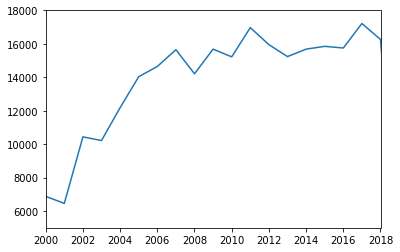

In [140]:
plt.plot(año['AñoDeclaradoC'],año['conteo'])
plt.axis([2000, 2018, 5000, 18000])

In [141]:
pd.value_counts(df5['MesDeclaradoC'])

1.0     79520
2.0     27908
3.0     23984
5.0     23355
10.0    23082
9.0     22758
8.0     22494
4.0     22305
7.0     22039
6.0     21330
11.0    19124
12.0    14680
Name: MesDeclaradoC, dtype: int64

In [142]:
100 * df5['MesDeclaradoC'].value_counts() / len(df5['MesDeclaradoC'])

1.0     24.501618
2.0      8.598983
3.0      7.389925
5.0      7.196118
10.0     7.112001
9.0      7.012171
8.0      6.930827
4.0      6.872593
7.0      6.790633
6.0      6.572177
11.0     5.892466
12.0     4.523186
Name: MesDeclaradoC, dtype: float64

In [144]:
pd.value_counts(df5['Status'])

P    317088
V      1090
Name: Status, dtype: int64

In [145]:
100 * df5['Status'].value_counts() / len(df5['Status'])

P    97.700817
V     0.335850
Name: Status, dtype: float64

In [146]:
pd.value_counts(df5['Clase_de_Matricula_Contribuye'])

C    128222
E    116938
      73018
Name: Clase_de_Matricula_Contribuye, dtype: int64

In [147]:
100 * df5['Clase_de_Matricula_Contribuye'].value_counts() / len(df5['Clase_de_Matricula_Contribuye'])

C    39.507626
E    36.030812
     22.498228
Name: Clase_de_Matricula_Contribuye, dtype: float64

In [148]:
pd.value_counts(df5['Opcion_de_Uso'])

3.0    147849
1.0    122728
2.0     47601
Name: Opcion_de_Uso, dtype: int64

In [152]:
df5['AñoFechaCreacion']=df5['Fecha_de_Creacion_del_formular'].dt.year

In [153]:
df5['MesFechaCreacion']=df5['Fecha_de_Creacion_del_formular'].dt.month

In [154]:
df5.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,2008-11-25,11,CR 036 010 041 00000,2466183,102.0,X,2.0,101,2008.0,11.0
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,...,2012-10-05,11,CL 017 037 A 080 00000,,100.0,,4.0,,2012.0,10.0
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
pd.value_counts(df5['Tipo_Sociedad'])

11    249820
12     30916
2      22557
3       9245
6       3302
5       1207
4        719
10       252
8         94
9         37
1         19
7          6
           4
Name: Tipo_Sociedad, dtype: int64

In [156]:
100 * df5['Tipo_Sociedad'].value_counts() / len(df5['Tipo_Sociedad'])

11    76.974272
12     9.525805
2      6.950239
3      2.848560
6      1.017409
5      0.371900
4      0.221538
10     0.077646
8      0.028963
9      0.011400
1      0.005854
7      0.001849
       0.001232
Name: Tipo_Sociedad, dtype: float64

In [167]:
df5.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,2008-11-25,11,CR 036 010 041 00000,2466183,102.0,X,2.0,101,2008.0,11.0
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,...,2012-10-05,11,CL 017 037 A 080 00000,,100.0,,4.0,,2012.0,10.0
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df5.dtypes

CC_o_Nit                                   object
Cl                                         object
AñoDeclaradoC                             float64
MesDeclaradoC                             float64
Anulacion                                   int64
TiempoRespuestaSolicitud          timedelta64[ns]
TiempoRespuestaDías                       float64
RespuestaPositiva                         float64
Status                                     object
Clase_de_Matricula_Contribuye              object
Opcion_de_Uso                             float64
Fecha_de_Creacion_del_formular     datetime64[ns]
Tipo_Sociedad                              object
Direccion                                  object
Telefono_1                                 object
OfVta                                     float64
Avisos                                     object
EstablecimientosRegistrados               float64
CodigoActividadF                           object
AñoFechaCreacion                          float64


In [186]:
df5.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,11,CR 036 010 041 00000,2466183,102.0,X,2.0,101,2008.0,11.0,0
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,...,11,CL 017 037 A 080 00000,,100.0,,4.0,,2012.0,10.0,0
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [189]:
df5['NuloDireccion']=df5['Direccion'].isnull()

In [190]:
df5.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,CR 036 010 041 00000,2466183,102.0,X,2.0,101,2008.0,11.0,0,False
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,...,CL 017 037 A 080 00000,,100.0,,4.0,,2012.0,10.0,0,False
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True


In [191]:
pd.value_counts(df5['NuloDireccion'])

False    318178
True       6372
Name: NuloDireccion, dtype: int64

In [192]:
100 * df5['NuloDireccion'].value_counts() / len(df5['NuloDireccion'])

False    98.036666
True      1.963334
Name: NuloDireccion, dtype: float64

In [196]:
df5[df5['Direccion']=='']

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion
2452,664696,PN,2005.0,2.0,0,NaT,NaN,NaN,P,E,...,,5284179,102.0,,3.0,,2013.0,8.0,0,False
50415,22234330,PN,2007.0,2.0,0,NaT,NaN,NaN,P,E,...,,,102.0,,2.0,,2009.0,3.0,0,False
93183,43404384,PN,1997.0,8.0,0,NaT,NaN,NaN,P,E,...,,,102.0,,2.0,,2009.0,3.0,0,False
110502,43748309,PN,2004.0,10.0,0,NaT,NaN,NaN,P,E,...,,,102.0,,2.0,,2009.0,10.0,0,False
112032,43802948,PN,1997.0,1.0,0,NaT,NaN,NaN,P,E,...,,4775300,102.0,,2.0,,2009.0,10.0,0,False
139230,70951305,PN,2006.0,2.0,0,NaT,NaN,NaN,P,E,...,,,102.0,,5.0,,2009.0,5.0,0,False
164193,71749143,PN,1995.0,11.0,0,NaT,NaN,NaN,P,E,...,,,102.0,,2.0,,2009.0,10.0,0,False
169714,71945327,PN,2005.0,9.0,0,NaT,NaN,NaN,P,E,...,,,102.0,,2.0,,2009.0,6.0,0,False
182634,98576121,PN,2007.0,6.0,0,NaT,NaN,NaN,P,E,...,,4441217,102.0,,3.0,,2010.0,11.0,0,False
189616,700025667,PN,2009.0,2.0,0,NaT,NaN,NaN,P,E,...,,,100.0,,2.0,,2009.0,3.0,0,False


In [197]:
df5.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,CR 036 010 041 00000,2466183,102.0,X,2.0,101,2008.0,11.0,0,False
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,...,CL 017 037 A 080 00000,,100.0,,4.0,,2012.0,10.0,0,False
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True


In [210]:
df5.dtypes

CC_o_Nit                                   object
Cl                                         object
AñoDeclaradoC                             float64
MesDeclaradoC                             float64
Anulacion                                   int64
TiempoRespuestaSolicitud          timedelta64[ns]
TiempoRespuestaDías                       float64
RespuestaPositiva                         float64
Status                                     object
Clase_de_Matricula_Contribuye              object
Opcion_de_Uso                             float64
Fecha_de_Creacion_del_formular     datetime64[ns]
Tipo_Sociedad                              object
Direccion                                  object
Telefono_1                                 object
OfVta                                     float64
Avisos                                     object
EstablecimientosRegistrados               float64
CodigoActividadF                           object
AñoFechaCreacion                          float64


In [224]:
df5['LongitudCedula'] = df5['CC_o_Nit'].map(str).apply(len)

In [225]:
df5.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCed,LongitudCedula
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,102.0,X,2.0,101,2008.0,11.0,0,False,None,1
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,...,100.0,,4.0,,2012.0,10.0,0,False,None,1
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,None,2
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,None,2
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,None,2


In [229]:
df5=df5.drop(['LongitudCed'],axis=1)

In [232]:
df5.head(10)

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,2466183,102.0,X,2.0,101,2008.0,11.0,0,False,1
1,6,PN,2012.0,3.0,1,138 days,138.0,138.0,P,E,...,,100.0,,4.0,,2012.0,10.0,0,False,1
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
5,149,PN,2001.0,1.0,0,0 days,0.0,0.0,P,,...,2629231,102.0,,2.0,105,2008.0,11.0,0,False,3
6,533,PN,2005.0,1.0,0,0 days,0.0,0.0,P,E,...,2282541,100.0,,4.0,308,2015.0,10.0,0,False,3
7,908,PN,1985.0,12.0,0,4414 days,4414.0,4414.0,P,,...,2493673,102.0,X,2.0,6230,2008.0,11.0,0,False,3
8,2417,PN,2002.0,12.0,0,889 days,889.0,889.0,P,,...,3123334,102.0,,4.0,206,2008.0,11.0,0,False,4
9,2961,PN,1961.0,1.0,0,5031 days,5031.0,5031.0,P,,...,2422161,102.0,X,2.0,101,2008.0,11.0,0,False,4


In [234]:
pd.value_counts(df5['Cl'],dropna=False)

PN    222904
SV    101578
SP        68
Name: Cl, dtype: int64

In [235]:
pd.value_counts(df5['AñoDeclaradoC'],dropna=False)

2017.0    17213
2011.0    16968
2018.0    16263
2012.0    15950
2015.0    15849
2016.0    15749
2009.0    15682
2014.0    15682
2007.0    15648
2013.0    15236
2010.0    15219
2006.0    14643
2008.0    14208
2005.0    14034
2004.0    12181
2002.0    10436
2003.0    10217
1998.0     6940
2000.0     6881
2001.0     6459
1999.0     6331
1995.0     4280
1997.0     4126
1994.0     3989
1996.0     3568
1950.0     2698
1991.0     2556
1993.0     2538
1985.0     2028
2019.0     2026
          ...  
1977.0      447
1979.0      434
1978.0      399
1980.0      375
1976.0      367
1974.0      337
1975.0      278
1973.0      241
1971.0      235
1972.0      233
1964.0      207
1968.0      200
1961.0      186
1969.0      184
1970.0      183
1958.0      181
1967.0      173
1965.0      170
1962.0      159
1963.0      157
1966.0      146
1960.0      142
1959.0      100
1956.0       12
1954.0        5
1952.0        2
1951.0        2
1945.0        2
2206.0        2
1953.0        1
Name: AñoDeclaradoC, Len

In [236]:
s=df5['AñoDeclaradoC'].isnull()

In [237]:
pd.value_counts(s,dropna=False)

False    322579
True       1971
Name: AñoDeclaradoC, dtype: int64

In [238]:
100 *s.value_counts() / len(s)

False    99.392698
True      0.607302
Name: AñoDeclaradoC, dtype: float64

In [239]:
s=df5['MesDeclaradoC'].isnull()

In [240]:
pd.value_counts(s,dropna=False)

False    322579
True       1971
Name: MesDeclaradoC, dtype: int64

In [241]:
100 *s.value_counts() / len(s)

False    99.392698
True      0.607302
Name: MesDeclaradoC, dtype: float64

In [242]:
pd.value_counts(df5['Anulacion'])

0    320506
1      4044
Name: Anulacion, dtype: int64

In [243]:
100 *df5['Anulacion'].value_counts() / len(df5['Anulacion'])

0    98.753967
1     1.246033
Name: Anulacion, dtype: float64

In [245]:
df6=df5[df5['Anulacion']==0]

In [246]:
df6.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Anulacion,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,...,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
0,1,PN,1986.0,1.0,0,-3430 days,-3430.0,NaN,P,,...,2466183,102.0,X,2.0,101,2008.0,11.0,0,False,1
2,21,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,0,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
5,149,PN,2001.0,1.0,0,0 days,0.0,0.0,P,,...,2629231,102.0,,2.0,105,2008.0,11.0,0,False,3


In [247]:
df6=df6.drop(['Anulacion'],axis=1)

In [248]:
df6.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,TiempoRespuestaSolicitud,TiempoRespuestaDías,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,Opcion_de_Uso,...,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
0,1,PN,1986.0,1.0,-3430 days,-3430.0,NaN,P,,3.0,...,2466183,102.0,X,2.0,101,2008.0,11.0,0,False,1
2,21,PN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
5,149,PN,2001.0,1.0,0 days,0.0,0.0,P,,3.0,...,2629231,102.0,,2.0,105,2008.0,11.0,0,False,3


In [249]:
df6=df6.drop(['TiempoRespuestaSolicitud','TiempoRespuestaDías'],axis=1)

In [250]:
df6.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,RespuestaPositiva,Status,Clase_de_Matricula_Contribuye,Opcion_de_Uso,Fecha_de_Creacion_del_formular,Tipo_Sociedad,...,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
0,1,PN,1986.0,1.0,NaN,P,,3.0,2008-11-25,11,...,2466183,102.0,X,2.0,101,2008.0,11.0,0,False,1
2,21,PN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
5,149,PN,2001.0,1.0,0.0,P,,3.0,2008-11-25,11,...,2629231,102.0,,2.0,105,2008.0,11.0,0,False,3


In [251]:
s=df6['RespuestaPositiva'].isnull()

In [252]:
pd.value_counts(s)

True     190736
False    129770
Name: RespuestaPositiva, dtype: int64

In [253]:
pd.value_counts(df6['RespuestaPositiva'])

0.0        44097
3226.0       261
28.0         221
35.0         210
368.0        208
34.0         200
273.0        200
118.0        198
36.0         195
140.0        192
63.0         191
85.0         191
125.0        189
90.0         189
95.0         188
146.0        187
64.0         187
119.0        185
126.0        183
186.0        183
92.0         181
42.0         181
57.0         180
84.0         179
29.0         179
62.0         178
91.0         178
27.0         178
68.0         177
56.0         176
           ...  
5990.0         1
4657.0         1
5991.0         1
3758.0         1
5987.0         1
3722.0         1
6279.0         1
4661.0         1
7244.0         1
3474.0         1
4663.0         1
3338.0         1
7759.0         1
3284.0         1
3659.0         1
4638.0         1
6292.0         1
4639.0         1
6182.0         1
6842.0         1
4324.0         1
4442.0         1
4649.0         1
4643.0         1
4280.0         1
4645.0         1
5985.0         1
3546.0        

In [254]:
df6=df6.drop(['RespuestaPositiva'],axis=1)

In [255]:
df6.head()

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Status,Clase_de_Matricula_Contribuye,Opcion_de_Uso,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
0,1,PN,1986.0,1.0,P,,3.0,2008-11-25,11,CR 036 010 041 00000,2466183,102.0,X,2.0,101,2008.0,11.0,0,False,1
2,21,PN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
5,149,PN,2001.0,1.0,P,,3.0,2008-11-25,11,CR 029 C 010 C 080 00000,2629231,102.0,,2.0,105,2008.0,11.0,0,False,3


In [256]:
s=df6['Status'].isnull()

In [257]:
pd.value_counts(s)

False    314276
True       6230
Name: Status, dtype: int64

In [258]:
100 *s.value_counts() / len(s)

False    98.056199
True      1.943801
Name: Status, dtype: float64

In [259]:
pd.value_counts(df6['Clase_de_Matricula_Contribuye'],dropna=False)

C      127694
E      114551
        72031
NaN      6230
Name: Clase_de_Matricula_Contribuye, dtype: int64

In [260]:
pd.value_counts(df6['Opcion_de_Uso'],dropna=False)

3.0    144356
1.0    122506
2.0     47414
NaN      6230
Name: Opcion_de_Uso, dtype: int64

In [261]:
df7=df6[df6['Opcion_de_Uso']!=3]

In [264]:
df7.head(100)

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Status,Clase_de_Matricula_Contribuye,Opcion_de_Uso,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
2,21,PN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
11,4500,SV,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
12,4501,SV,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
14,4503,SV,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
15,4898,PN,2017.0,8.0,P,C,1.0,2017-08-25,11,CR 043 A 008 067 00000,0,100.0,,1.0,7020,2017.0,8.0,0,False,4
16,5199,PN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
17,7099,PN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
18,7199,PN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4


In [265]:
d_CC_o_Nit=df7.duplicated('CC_o_Nit')

In [266]:
pd.value_counts(d_CC_o_Nit,dropna=False)

False    176118
True         32
dtype: int64

In [268]:
pd.value_counts(df7['Cl'],dropna=False)

PN    109826
SV     66266
SP        58
Name: Cl, dtype: int64

In [274]:
pd.value_counts(df7['AñoDeclaradoC'],dropna=False)

2018.0    15533
2017.0    14587
2016.0    12274
2015.0    11360
2014.0    11044
2011.0    10515
2012.0    10185
2013.0    10047
2010.0     9362
2009.0     9187
2007.0     8776
2008.0     8229
2006.0     7277
2005.0     6021
2004.0     4755
2003.0     3369
2002.0     3229
2019.0     2026
2001.0     1922
2000.0     1864
NaN        1641
1998.0     1619
1999.0     1483
1997.0      971
1995.0      952
1950.0      903
1994.0      868
1996.0      765
1993.0      570
1991.0      553
          ...  
1957.0      162
1982.0      142
1979.0      120
1980.0      108
1977.0      107
1976.0       94
1978.0       93
1989.0       84
1974.0       82
1975.0       78
1973.0       77
1972.0       61
1971.0       60
1988.0       59
1968.0       54
1964.0       53
1965.0       47
1963.0       45
1970.0       45
1967.0       45
1958.0       44
1969.0       40
1960.0       37
1961.0       37
1962.0       36
1966.0       25
1959.0       22
1956.0        3
1954.0        2
1951.0        2
Name: AñoDeclaradoC, Len

In [277]:
100*df7['AñoDeclaradoC'].value_counts(dropna=False) / len(df7['AñoDeclaradoC'])

2018.0    8.818053
2017.0    8.281011
2016.0    6.967925
2015.0    6.449049
2014.0    6.269657
2011.0    5.969344
2012.0    5.782004
2013.0    5.703662
2010.0    5.314789
2009.0    5.215441
2007.0    4.982118
2008.0    4.671587
2006.0    4.131138
2005.0    3.418110
2004.0    2.699404
2003.0    1.912575
2002.0    1.833097
2019.0    1.150156
2001.0    1.091116
2000.0    1.058189
NaN       0.931592
1998.0    0.919103
1999.0    0.841896
1997.0    0.551235
1995.0    0.540448
1950.0    0.512631
1994.0    0.492762
1996.0    0.434289
1993.0    0.323588
1991.0    0.313937
            ...   
1957.0    0.091967
1982.0    0.080613
1979.0    0.068124
1980.0    0.061311
1977.0    0.060744
1976.0    0.053364
1978.0    0.052796
1989.0    0.047687
1974.0    0.046551
1975.0    0.044280
1973.0    0.043713
1972.0    0.034630
1971.0    0.034062
1988.0    0.033494
1968.0    0.030656
1964.0    0.030088
1965.0    0.026682
1963.0    0.025546
1970.0    0.025546
1967.0    0.025546
1958.0    0.024979
1969.0    0.

In [278]:
pd.value_counts(df7['Status'],dropna=False)

P      168867
NaN      6230
V        1053
Name: Status, dtype: int64

In [279]:
df7=df7.drop(['Status'],axis=1)

In [281]:
df7.head(100)

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Clase_de_Matricula_Contribuye,Opcion_de_Uso,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
2,21,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
11,4500,SV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
12,4501,SV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
14,4503,SV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
15,4898,PN,2017.0,8.0,C,1.0,2017-08-25,11,CR 043 A 008 067 00000,0,100.0,,1.0,7020,2017.0,8.0,0,False,4
16,5199,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
17,7099,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
18,7199,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4


In [284]:
def Contribuyente(v1, v2):   
    if (v1=="C" and v2==1):
        return 1
    else:
        return 0   

In [285]:
df7['Contribuyente'] = df7.apply(lambda x: Contribuyente(x.Clase_de_Matricula_Contribuye,x.EstablecimientosRegistrados), axis=1)

In [286]:
df7.head(100)

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Clase_de_Matricula_Contribuye,Opcion_de_Uso,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula,Contribuyente
2,21,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2,0
3,51,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2,0
4,82,PN,2014.0,8.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2,0
11,4500,SV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4,0
12,4501,SV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4,0
14,4503,SV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4,0
15,4898,PN,2017.0,8.0,C,1.0,2017-08-25,11,CR 043 A 008 067 00000,0,100.0,,1.0,7020,2017.0,8.0,0,False,4,1
16,5199,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4,0
17,7099,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4,0
18,7199,PN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4,0


In [287]:
pd.value_counts(df7['Clase_de_Matricula_Contribuye'],dropna=False)

C      119509
E       48527
NaN      6230
         1884
Name: Clase_de_Matricula_Contribuye, dtype: int64

In [288]:
pd.value_counts(df7['Contribuyente'],dropna=False)

0    103975
1     72175
Name: Contribuyente, dtype: int64

In [289]:
df7=df7.drop(['Clase_de_Matricula_Contribuye','Contribuyente'],axis=1)

In [291]:
df7.head(100)

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Opcion_de_Uso,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
2,21,PN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
11,4500,SV,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
12,4501,SV,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
14,4503,SV,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
15,4898,PN,2017.0,8.0,1.0,2017-08-25,11,CR 043 A 008 067 00000,0,100.0,,1.0,7020,2017.0,8.0,0,False,4
16,5199,PN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
17,7099,PN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
18,7199,PN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4


In [292]:
df7=df7.drop(['Opcion_de_Uso'],axis=1)

In [294]:
df7.head(100)

,CC_o_Nit,Cl,AñoDeclaradoC,MesDeclaradoC,Fecha_de_Creacion_del_formular,Tipo_Sociedad,Direccion,Telefono_1,OfVta,Avisos,EstablecimientosRegistrados,CodigoActividadF,AñoFechaCreacion,MesFechaCreacion,T_Casa,NuloDireccion,LongitudCedula
2,21,PN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
3,51,PN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
4,82,PN,2014.0,8.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,2
11,4500,SV,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
12,4501,SV,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
14,4503,SV,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
15,4898,PN,2017.0,8.0,2017-08-25,11,CR 043 A 008 067 00000,0,100.0,,1.0,7020,2017.0,8.0,0,False,4
16,5199,PN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
17,7099,PN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
18,7199,PN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,4
